**Preparación de los datos**

*Limpieza de los datos*

**Importar librerias**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

import seaborn as sns
import unicodedata
%matplotlib inline

**Importar path del archivo a leer **

In [21]:
path_file = r'c:\Users\Usuario\Desktop\Querys de R\Python DATASCIENCE\KR'

In [22]:
df = pd.read_csv('KRvideos_cc50_202101.csv')
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22.0,13/11/2017 2:07,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130.0,1422.0,40.0,272.0,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,FALSO,FALSO,FALSO,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,Taegu Gwangyoksi,35.866789,128.606971,POINT (128.6069714 35.86678876)
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25.0,13/11/2017 5:59,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533.0,211.0,28.0,113.0,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,FALSO,FALSO,FALSO,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,Daejeon,36.335546,127.425028,POINT (127.425028 36.33554567)
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22.0,11/11/2017 2:16,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409.0,5112.0,166.0,459.0,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,FALSO,FALSO,FALSO,퍼가실때 꼭 출처 부탁드려요,Chungcheongbuk Do,36.935251,127.689715,POINT (127.6897147 36.93525067)
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25.0,12/11/2017 6:19,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850.0,2093.0,173.0,1219.0,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,FALSO,FALSO,FALSO,다스는 누구겁니까 듣고 난 후 표정,Kwangju Gwangyoksi,35.170966,126.910434,POINT (126.9104341 35.1709656)
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25.0,13/11/2017 6:08,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466.0,1094.0,109.0,450.0,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,FALSO,FALSO,FALSO,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,Chungcheongbuk Do,36.935251,127.689715,POINT (127.6897147 36.93525067)


**Verificamos si hay nulls en el dataframe**


In [23]:
df.isnull().sum()

video_id                   156
trending_date             2167
title                     2305
channel_title             2322
category_id               2330
publish_time              2330
tags                      2329
views                     2330
likes                     2330
dislikes                  2330
comment_count             2330
thumbnail_link            2329
comments_disabled         2330
ratings_disabled          2330
video_error_or_removed    2330
description               5493
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Reemplazamos los nulls en las variAbles numericas por la mediana**

*Y creamos nuevas columnas sin los nulls*

En otro dataframe que ya no tenga los nulls pero con una nueva columna



In [24]:
df_sin_null=df.fillna(df.median(numeric_only=True))

for column in df.columns:
    if df[column].isnull().sum() > 0:
        new_col_name = column + 'sin NA'
        df_sin_null[new_col_name] = df[column].isnull().astype(int)

Procedemos ahora eliminar las filas que tengan valores nulls en las variables object

In [25]:
float_columns = df.select_dtypes(include=['object']).columns
df_sin_null = df_sin_null.dropna(subset=float_columns)



Verificamos si hay nulos

In [26]:
df_sin_null.isnull().sum()

video_id                        0
trending_date                   0
title                           0
channel_title                   0
category_id                     0
publish_time                    0
tags                            0
views                           0
likes                           0
dislikes                        0
comment_count                   0
thumbnail_link                  0
comments_disabled               0
ratings_disabled                0
video_error_or_removed          0
description                     0
state                           0
lat                             0
lon                             0
geometry                        0
video_idsin NA                  0
trending_datesin NA             0
titlesin NA                     0
channel_titlesin NA             0
category_idsin NA               0
publish_timesin NA              0
tagssin NA                      0
viewssin NA                     0
likessin NA                     0
dislikessin NA

In [27]:
df_sin_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31404 entries, 0 to 36896
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   video_id                      31404 non-null  object 
 1   trending_date                 31404 non-null  object 
 2   title                         31404 non-null  object 
 3   channel_title                 31404 non-null  object 
 4   category_id                   31404 non-null  float64
 5   publish_time                  31404 non-null  object 
 6   tags                          31404 non-null  object 
 7   views                         31404 non-null  float64
 8   likes                         31404 non-null  float64
 9   dislikes                      31404 non-null  float64
 10  comment_count                 31404 non-null  float64
 11  thumbnail_link                31404 non-null  object 
 12  comments_disabled             31404 non-null  object 
 13  rating

Exportamos el csv sin nulls

In [28]:
df_sin_null.to_csv('data_sin_nulls.csv')

***Con este data frame nuevo (sin nulls) haremos los reportes***

**Por categoría de videos**

1. ¿Qué categorías de videos son las de mayor tendencia?


findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

 category_id  video_count
        24.0         8526
        25.0         6668
        22.0         5800
         1.0         2031
        23.0         1960
        10.0         1730
        20.0         1356
        17.0          868
        15.0          712
        26.0          545
        27.0          455
        29.0          286
        43.0          165
         2.0          112
        28.0          102
        19.0           86
        44.0            2


findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

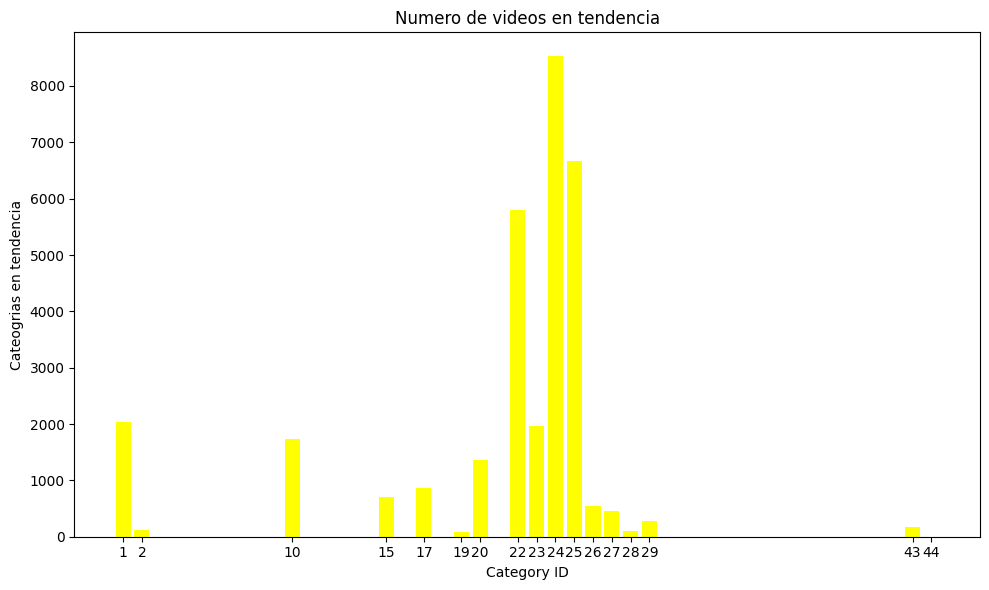

In [29]:
category_trend = df_sin_null.groupby('category_id').size().reset_index(name='video_count')

category_trend_sorted = category_trend.sort_values(by='video_count', ascending=False)
print(category_trend_sorted.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.bar(category_trend_sorted['category_id'], category_trend_sorted['video_count'], color='yellow')
plt.xlabel('Category ID')
plt.ylabel('Cateogrias en tendencia')
plt.title('Numero de videos en tendencia')
plt.xticks(category_trend_sorted['category_id'])
plt.tight_layout()
plt.show()

La categoría que más videos en tendencia tiene es el ID 24.Es  "Entretenimiento" 

2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

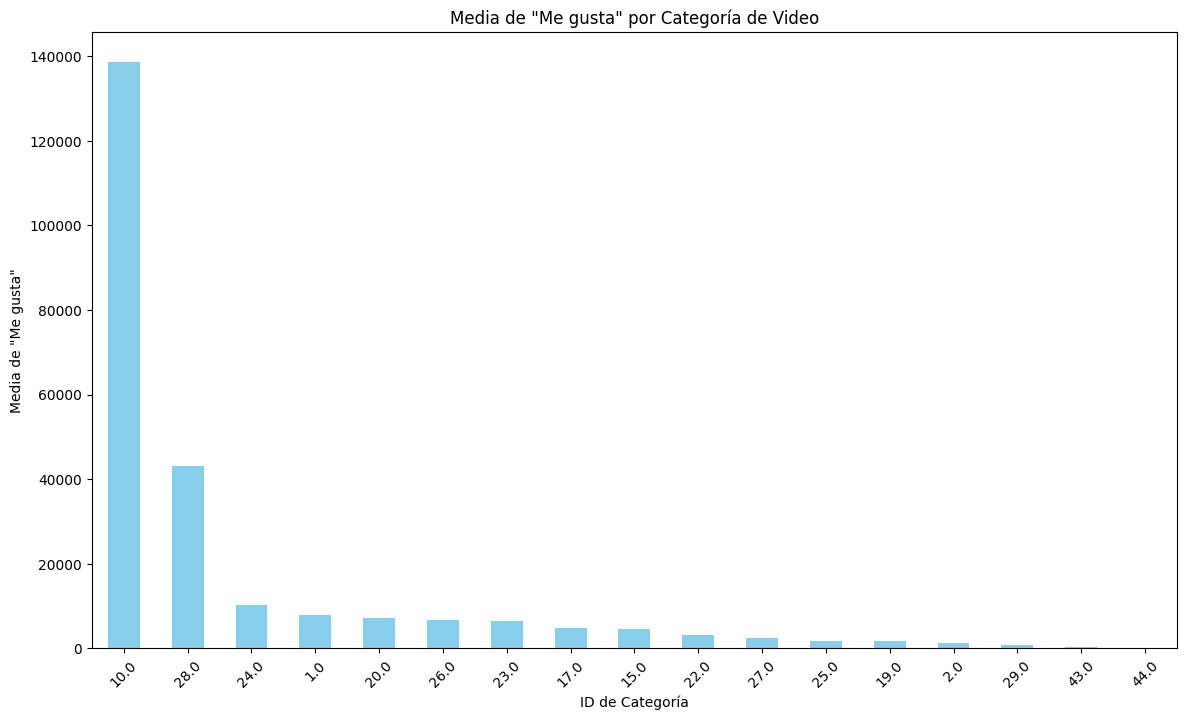

In [30]:
likes_por_categoria = df_sin_null.groupby('category_id')['likes'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
likes_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Media de "Me gusta" por Categoría de Video')
plt.xlabel('ID de Categoría')
plt.ylabel('Media de "Me gusta"')
plt.xticks(rotation=45)
plt.show()

Las categorías que más gustan son la 10,28 y 24. Que son "Música" , "Ciencia y tecnología" y "Entretenimiento" respectivamente.
Y las que menos gustan son la 2, 43 y 44. Que respectivamente son "Autos y Vehiculos", "Shows" y "Trailers" 

**3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?**

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

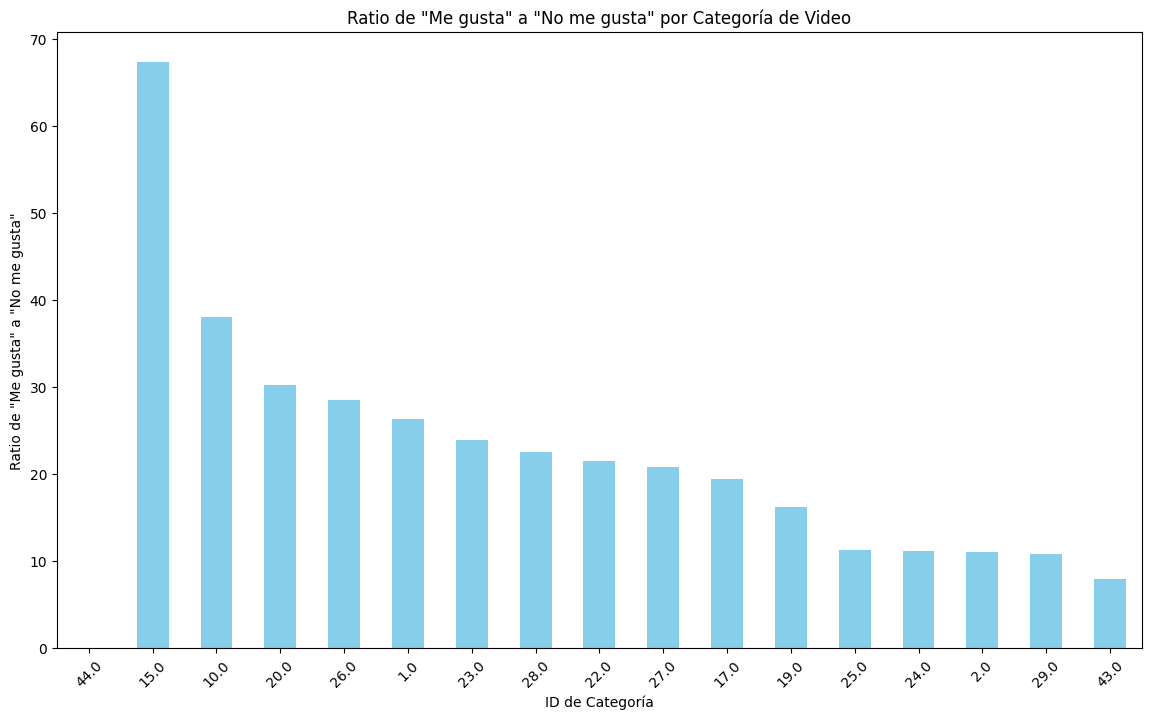

In [31]:
Radio_dislike_like = (df_sin_null.groupby('category_id')['likes'].sum() / df_sin_null.groupby('category_id')['dislikes'].sum()).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
Radio_dislike_like.plot(kind='bar', color='skyblue')
plt.title('Ratio de "Me gusta" a "No me gusta" por Categoría de Video')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio de "Me gusta" a "No me gusta"')
plt.xticks(rotation=45)
plt.show()

El ratio entre me gusta y no me gusta, es mejor en la categoría 44 (trailers), no tiene no me gusta, la proporción es más me gusta. La segunda categoría es la categoría 15 (Mascotas y animales). Por ultimo, la que más no me gusta tiene por encima de me gusta es la categoría 43 (Shows).

4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas"

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

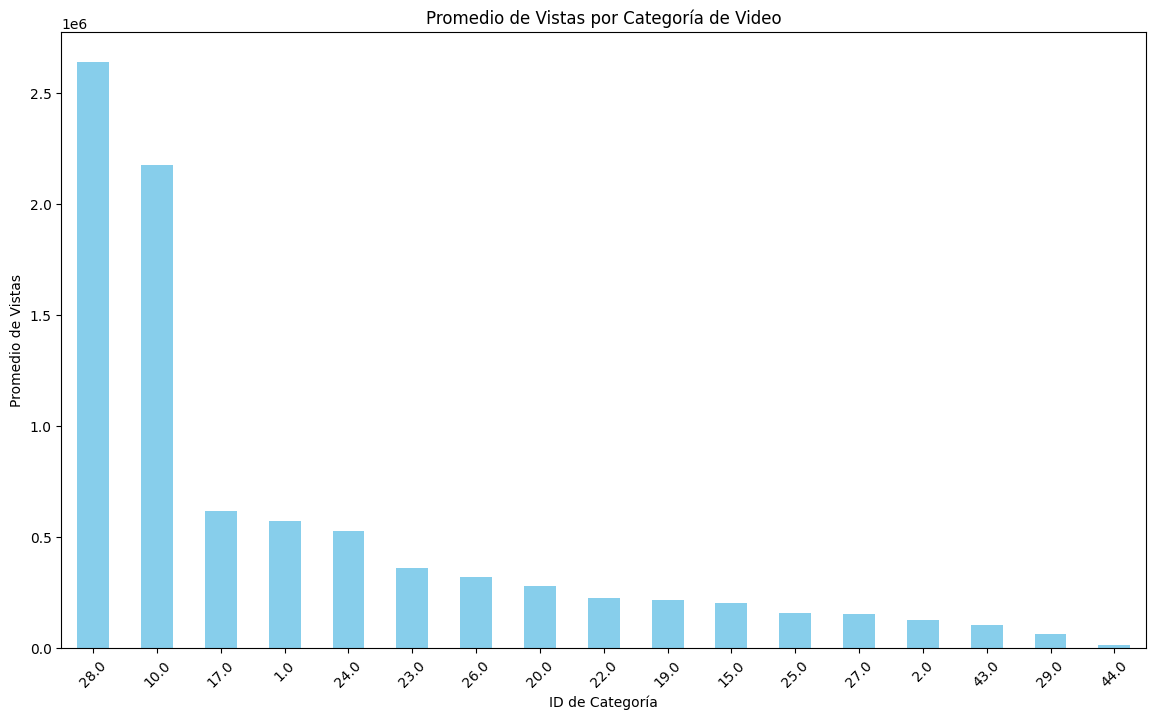

In [32]:
vistas_por_categoria = df_sin_null.groupby('category_id')['views'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 8))
vistas_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Promedio de Vistas por Categoría de Video')
plt.xlabel('ID de Categoría')
plt.ylabel('Promedio de Vistas')
plt.xticks(rotation=45)
plt.show()

La categoría 28 "Ciencia y tecnología" es la que en promedio más vistas tiene, en segundo lugar "Música" y en tercer lugar la 17 "Deportes"

**5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

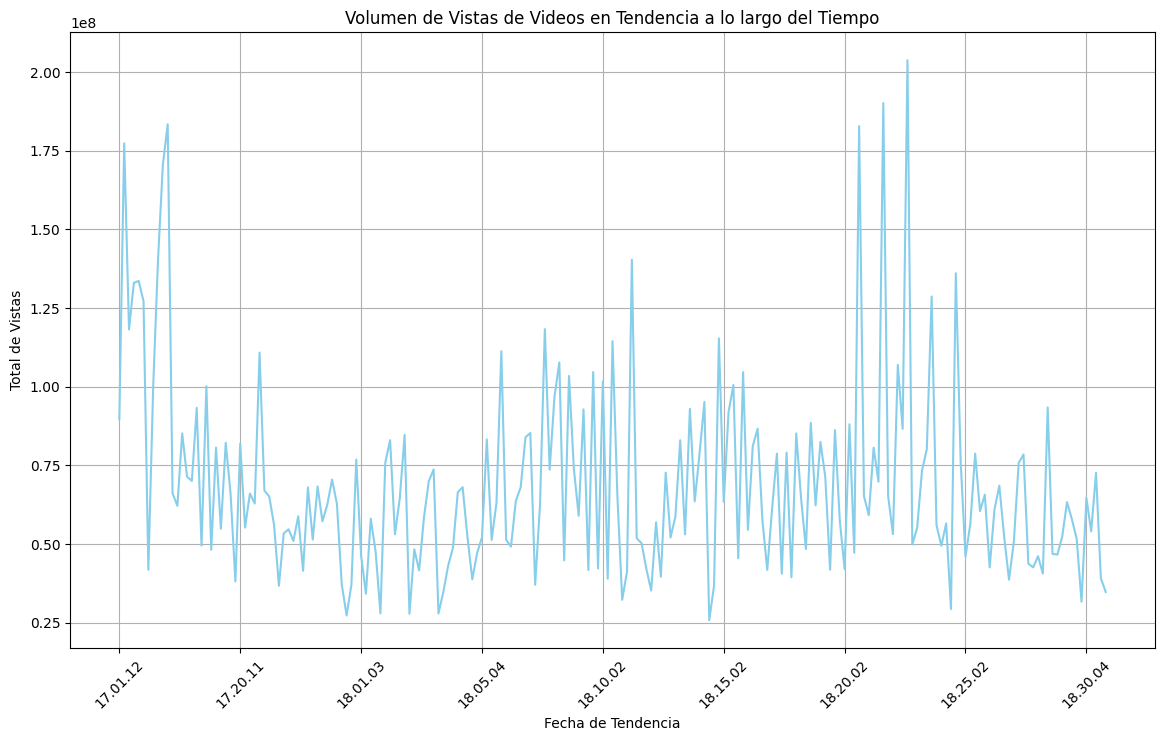

In [33]:
vistas_con_el_tiempo = df_sin_null.groupby('trending_date')['views'].sum()


plt.figure(figsize=(14, 8))
vistas_con_el_tiempo.plot(kind='line', color='skyblue')
plt.title('Volumen de Vistas de Videos en Tendencia a lo largo del Tiempo')
plt.xlabel('Fecha de Tendencia')
plt.ylabel('Total de Vistas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Con el gráfico podemos observar que al principio de los registros del data set las vistas fueron bajas, pero con el pasar del tiempo fueron subiendo.

**6.¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.


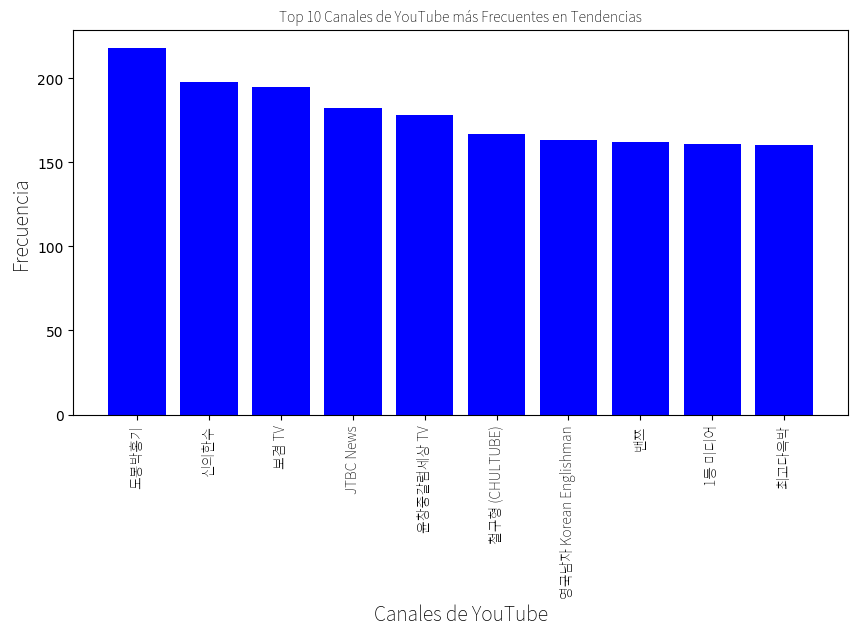

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
C:\Users\dan25\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21355 (\N{CJK UNIFIED IDEOGRAPH-536B}) missing from font(s) Noto Sans KR.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dan25\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) Noto Sans KR.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dan25\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Noto Sans KR.
  fig.canvas.print_

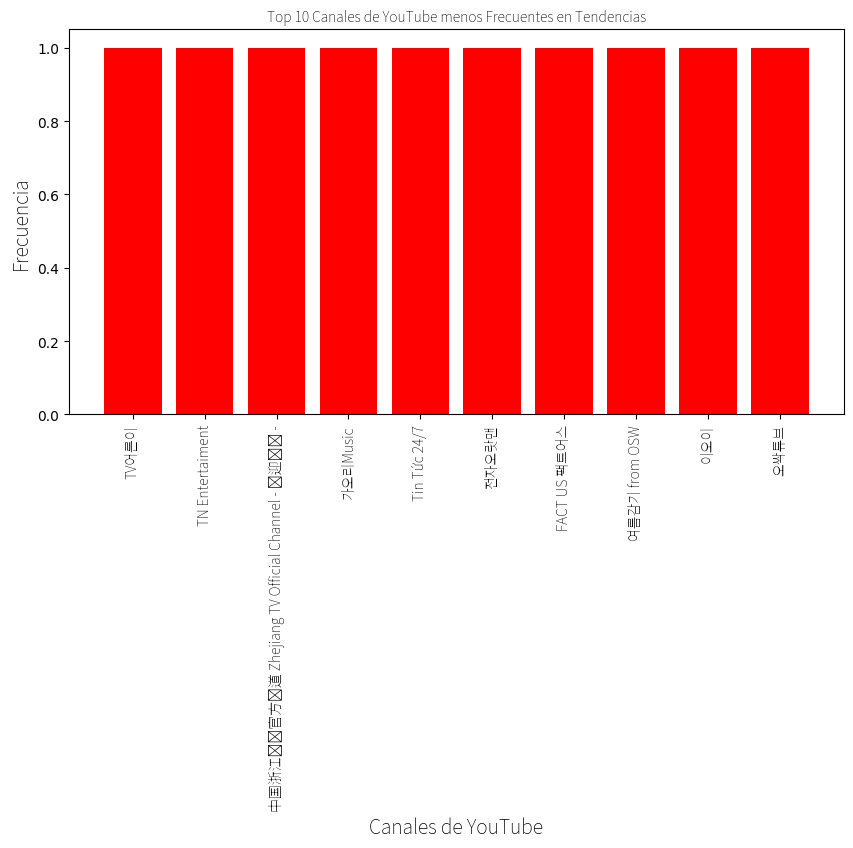

In [34]:

font_path = 'NotoSansKR-VariableFont_wght.ttf'  
font_prop = fm.FontProperties(fname=font_path)

rcParams['font.family'] = font_prop.get_name()

channel_counts = df_sin_null['channel_title'].value_counts()

top_10_canales = channel_counts.head(10)
canales_menos_tendencia = channel_counts.tail(10)

plt.figure(figsize=(10, 5))
plt.bar(top_10_canales.index, top_10_canales.values, color='blue')
plt.xlabel('Canales de YouTube', fontsize=14, fontproperties=font_prop)
plt.ylabel('Frecuencia', fontsize=14, fontproperties=font_prop)
plt.title('Top 10 Canales de YouTube más Frecuentes en Tendencias', fontsize=16, fontproperties=font_prop)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(canales_menos_tendencia.index, canales_menos_tendencia.values, color='red')
plt.xlabel('Canales de YouTube', fontsize=14, fontproperties=font_prop)
plt.ylabel('Frecuencia', fontsize=14, fontproperties=font_prop)
plt.title('Top 10 Canales de YouTube menos Frecuentes en Tendencias', fontsize=16, fontproperties=font_prop)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()


**7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

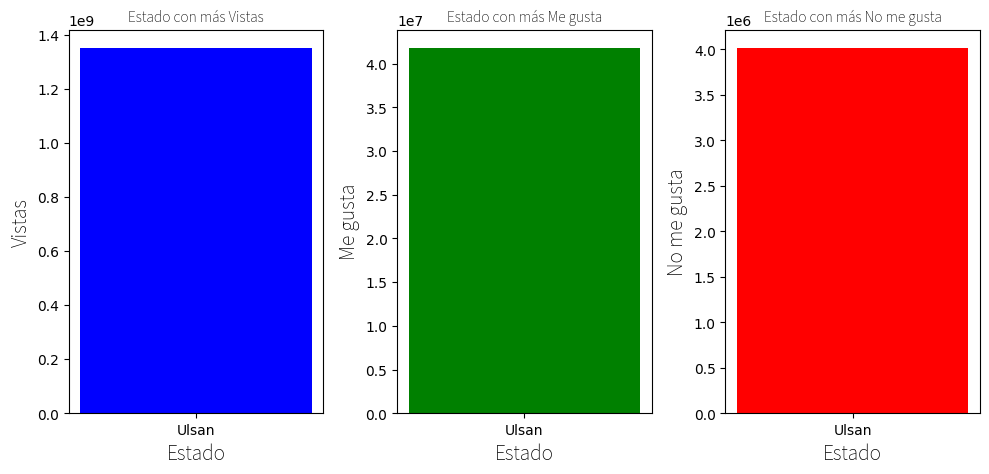

Estado con más vistas: Ulsan (1351042639.0 vistas)
Estado con más me gusta: Ulsan (41783058.0 me gusta)
Estado con más no me gusta: Ulsan (4015778.0 no me gusta)


In [35]:

font_path = 'NotoSansKR-VariableFont_wght.ttf'  # Ajusta esta ruta según tu sistema
font_prop = fm.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()

state_stats = df_sin_null.groupby('state')[['views', 'likes', 'dislikes']].sum()

top_views_state = state_stats['views'].idxmax()
top_likes_state = state_stats['likes'].idxmax()
top_dislikes_state = state_stats['dislikes'].idxmax()


top_views = state_stats.loc[top_views_state, 'views']
top_likes = state_stats.loc[top_likes_state, 'likes']
top_dislikes = state_stats.loc[top_dislikes_state, 'dislikes']


plt.figure(figsize=(10, 5))

# Gráfica de Vistas
plt.subplot(1, 3, 1)
plt.bar(top_views_state, top_views, color='blue')
plt.xlabel('Estado', fontsize=14, fontproperties=font_prop)
plt.ylabel('Vistas', fontsize=14, fontproperties=font_prop)
plt.title('Estado con más Vistas', fontsize=16, fontproperties=font_prop)

# Gráfica de Me gusta
plt.subplot(1, 3, 2)
plt.bar(top_likes_state, top_likes, color='green')
plt.xlabel('Estado', fontsize=14, fontproperties=font_prop)
plt.ylabel('Me gusta', fontsize=14, fontproperties=font_prop)
plt.title('Estado con más Me gusta', fontsize=16, fontproperties=font_prop)

# Gráfica de No me gusta
plt.subplot(1, 3, 3)
plt.bar(top_dislikes_state, top_dislikes, color='red')
plt.xlabel('Estado', fontsize=14, fontproperties=font_prop)
plt.ylabel('No me gusta', fontsize=14, fontproperties=font_prop)
plt.title('Estado con más No me gusta', fontsize=16, fontproperties=font_prop)

plt.tight_layout()
plt.show()
print(f"Estado con más vistas: {top_views_state} ({top_views} vistas)")
print(f"Estado con más me gusta: {top_likes_state} ({top_likes} me gusta)")
print(f"Estado con más no me gusta: {top_dislikes_state} ({top_dislikes} no me gusta)")

In [36]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
max_metrics = df_sin_null.groupby('state').agg({
    'lat': 'first',
    'lon': 'first',
    'likes': 'max',
    'views': 'max',
    'dislikes': 'max'
}).reset_index()

fig = px.scatter_geo(max_metrics,
                     lat='lat',
                     lon='lon',
                     size='likes',
                     hover_name='state',
                     hover_data={'lat': True, 'lon': True, 'likes': True, 'views': True, 'dislikes': True},
                     color='likes',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Máximo de Likes, Views y Dislikes por Estado en Corea del Sur')

fig.update_geos(
    scope='asia',
    projection_type='natural earth'
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Likes',
        ticks='outside'
    )
)

NameError: name 'df_sin_null' is not defined

** 8.¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”? **


** 9. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben? **

C:\Users\dan25\AppData\Local\Temp\ipykernel_14104\2115537325.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Promedio de Comentarios', 'Mediana de Comentarios'], y=[mean_comments, median_comments], palette="muted")


findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

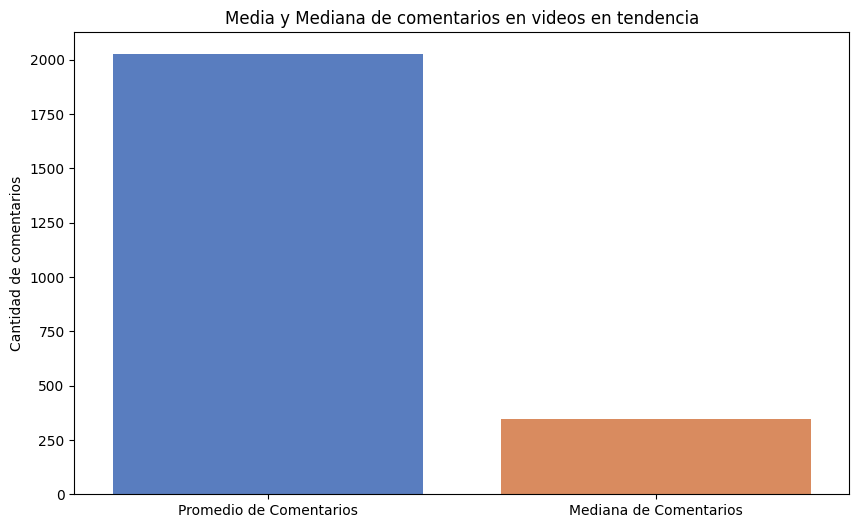

2025.3825035438424
345.0


In [18]:
relevant_columns = ['video_id', 'trending_date', 'views', 'likes', 'dislikes', 'comment_count']
df_sin_null = df[relevant_columns].dropna()

df_sin_null['in_trending'] = df_sin_null['trending_date'].notna()

df_trending = df_sin_null[df_sin_null['in_trending']]

mean_comments = df_trending['comment_count'].mean()
median_comments = df_trending['comment_count'].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Promedio de Comentarios', 'Mediana de Comentarios'], y=[mean_comments, median_comments], palette="muted")
plt.title('Media y Mediana de comentarios en videos en tendencia')
plt.ylabel('Cantidad de comentarios')
plt.show()
print(mean_comments)
print(median_comments)

Podemos ver en al gráfica que la media de comentarios por videos es aporximandamente de 2020 comentarios por video, tambien que la mediana es de 345 comentarios en un video. Podemos decir que sí, los videos en tendencia son los que más comentarios reciben.

# MODELIZAR Y EVALUAR LOS RESULTADOS

### Regresion Lineal 

In [19]:
df_sin_null.head()

,video_id,trending_date,views,likes,dislikes,comment_count,in_trending
0,RxGQe4EeEpA,17.14.11,156130.0,1422.0,40.0,272.0,True
1,hH7wVE8OlQ0,17.14.11,76533.0,211.0,28.0,113.0,True
2,9V8bnWUmE9U,17.14.11,421409.0,5112.0,166.0,459.0,True
3,0_8py-t5R80,17.14.11,222850.0,2093.0,173.0,1219.0,True
4,bk55RbxiQdI,17.14.11,84466.0,1094.0,109.0,450.0,True


In [20]:
df_RL = df_sin_null[['views', 'likes', 'dislikes', 'comment_count']].copy()


In [21]:
df_RL.head()

,views,likes,dislikes,comment_count
0,156130.0,1422.0,40.0,272.0
1,76533.0,211.0,28.0,113.0
2,421409.0,5112.0,166.0,459.0
3,222850.0,2093.0,173.0,1219.0
4,84466.0,1094.0,109.0,450.0


### Primero crearemos un mapa de calor para determinar que tipo de regresion podria ser

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

<Axes: >

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

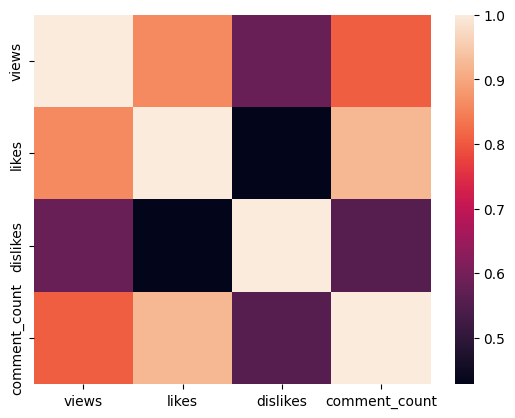

In [22]:
sns.heatmap(df_RL.corr())

### Crearemos un modelo de regresión lineal multiple

In [23]:
X = df_RL[['views', 'likes', 'dislikes', 'comment_count']]
Y = df_RL[['views']]

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

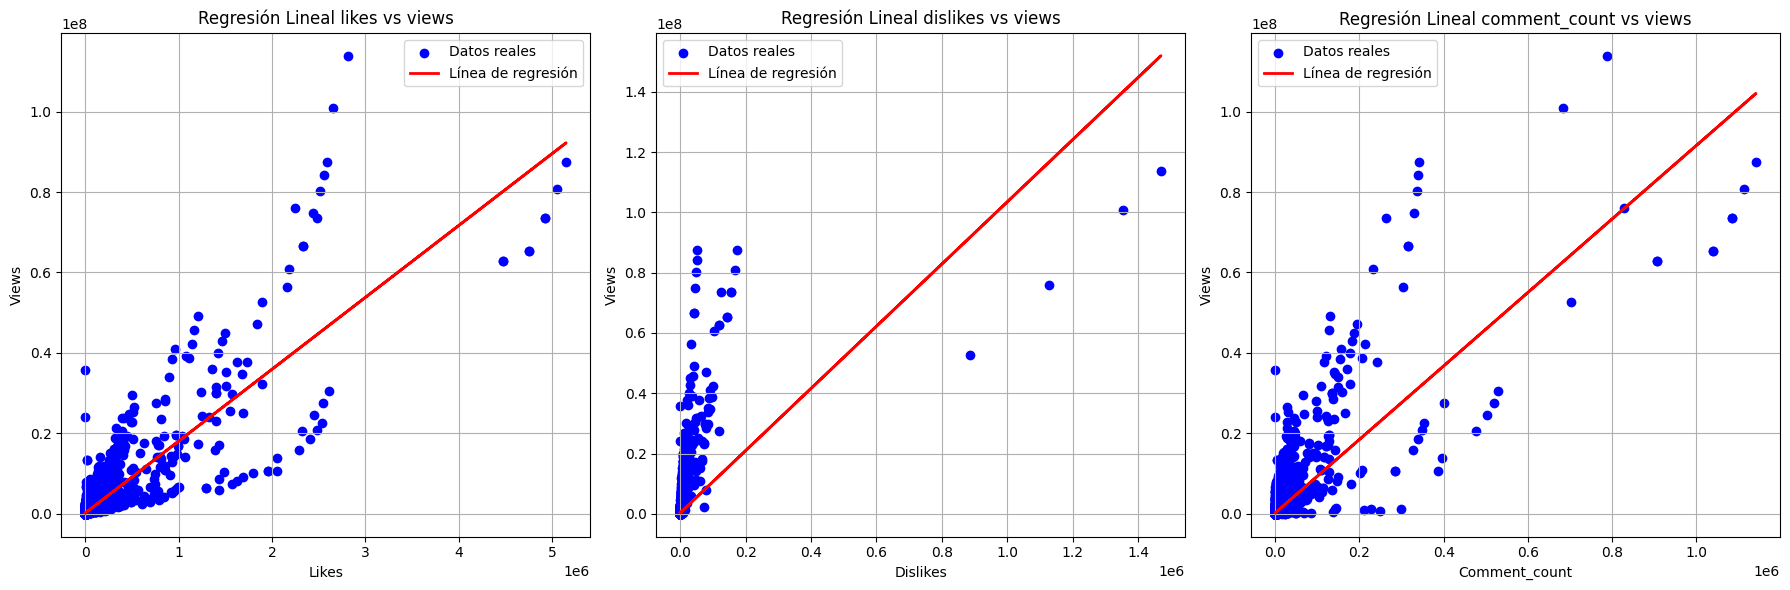

In [25]:
predictors = ['likes', 'dislikes', 'comment_count']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


for i, predictor in enumerate(predictors):
    X = df_RL[[predictor]]
    y = df_RL['views']
    
    model = LinearRegression()
    model.fit(X, y)
        
    y_pred = model.predict(X)
    
    axs[i].scatter(X, y, color='blue', label='Datos reales')
    axs[i].plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    axs[i].set_title(f'Regresión Lineal {predictor} vs views')
    axs[i].set_xlabel(predictor.capitalize())
    axs[i].set_ylabel('Views')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not

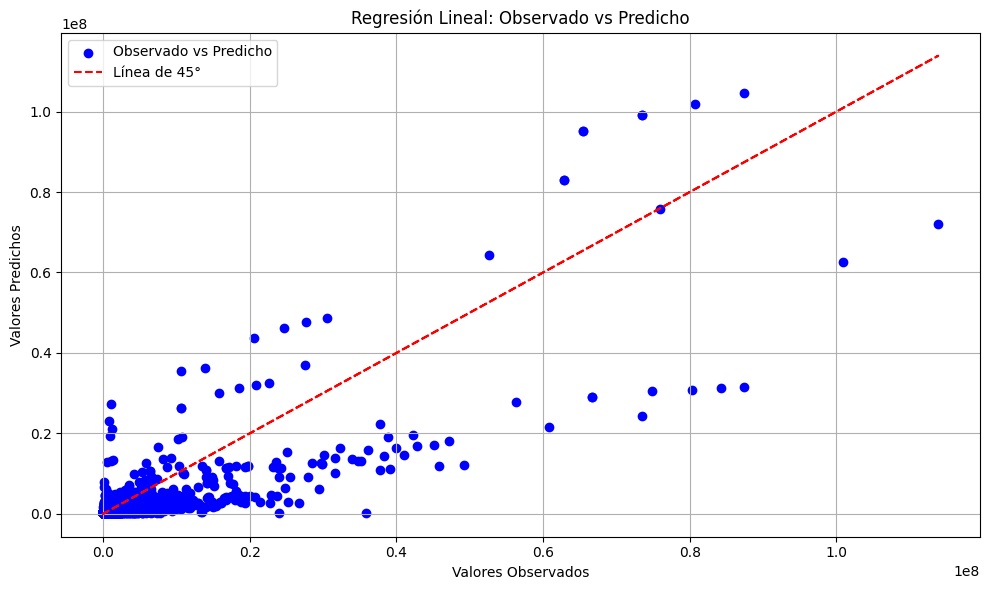

In [26]:
plt.figure(figsize=(10, 6))

plt.scatter(Y, y_pred, color='blue', label='Observado vs Predicho')
plt.plot(Y, Y, color='red', linestyle='--', label='Línea de 45°')

plt.title('Regresión Lineal: Observado vs Predicho')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Predicciones del modelo

In [27]:
y_pred = model.predict(X)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')


Error Cuadrático Medio (MSE): 2054638443640.5967
Error Absoluto Medio (MAE): 340234.40754158254
Coeficiente de Determinación (R²): 0.6522174696299066
